# Filter the OTU table and the taxonomy

The taxonomy must be filtered and reduced to make it handable for further processing.

First, python modules get imported and constants get defined to make the work easier.

In [1]:
import pandas as pd
import matplotlib_venn as vplt
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter

In [2]:
KINGDOM = 'Kingdom'
PHYLUM = 'Phylum'
CLASS = 'Class'
ORDER = 'Order'
FAMILY = 'Family'
GENUS = 'Genus'
SPECIES = 'Species'
ADDITION = 'Addition'
ORIGIN = 'Origin'
TAXON = 'Taxon'
SILVA = 'SILVA'
UNITE = 'UNITE'
PR2 = 'PR2'
CONFIDENCE = 'Confidence'
MARKERGENE = 'Markergene'
BACTERIA = 'bacteria'
FUNGI = 'fungi'
OOMYCETE = 'oomycete'
EUKARYOTE = 'eukaryote'
DOMAIN = 'Domain'
SUPERGROUP = 'Supergroup'
DIVISION = 'Division'
SUBDIVISION = 'Subdivision'

## Import

Now the otu tables get imported, transformed and combined.

In [3]:
otu_bac_table = pd.read_csv('raw_otu_and_tax/Approach6/otu_table_bac_ap6.txt',sep='\t', low_memory=False, skiprows = 1)
otu_bac_table['#OTU ID'] = otu_bac_table['#OTU ID'] + '_'+BACTERIA

otu_fun_table = pd.read_csv('raw_otu_and_tax/Approach6/otu_table_fun_ap6.txt',sep='\t', low_memory=False, skiprows = 1)
otu_fun_table['#OTU ID'] = otu_fun_table['#OTU ID'] + '_'+FUNGI

otu_oom_table = pd.read_csv('raw_otu_and_tax/Approach6/otu_table_oom_ap6.txt',sep='\t', low_memory=False, skiprows = 1)
otu_oom_table['#OTU ID'] = otu_oom_table['#OTU ID'] + '_'+OOMYCETE

otu_euk_table = pd.read_csv('raw_otu_and_tax/Approach6/otu_table_euk_ap6.txt',sep='\t', low_memory=False, skiprows = 1)
otu_euk_table['#OTU ID'] = otu_euk_table['#OTU ID'] + '_'+EUKARYOTE

otu_frequency_raw = pd.concat([otu_bac_table, otu_fun_table, otu_oom_table, otu_euk_table], ignore_index=True, sort=False)
otu_frequency_raw.set_index('#OTU ID', inplace=True)
otu_frequency_raw = otu_frequency_raw.fillna(0)

Now the same gets done for the taxonomy table:

In [4]:
def process_taxonomy_to_workready_silva(input_file,markergene):
    input_file = input_file.drop(input_file.index[0])
    input_file[[DOMAIN, PHYLUM, CLASS, ORDER, FAMILY, GENUS, SPECIES]] = input_file[TAXON].str.split(';', expand=True)
    input_file = input_file.drop(TAXON, axis=1)
    input_file[DOMAIN] = input_file[DOMAIN].str.replace('d__', '', regex=False)
    input_file[PHYLUM] = input_file[PHYLUM].str.replace('p__', '', regex=False)
    input_file[CLASS] = input_file[CLASS].str.replace('c__', '', regex=False)
    input_file[ORDER] = input_file[ORDER].str.replace('o__', '', regex=False)
    input_file[FAMILY] = input_file[FAMILY].str.replace('f__', '', regex=False)
    input_file[GENUS] = input_file[GENUS].str.replace('g__', '', regex=False)
    input_file[SPECIES] = input_file[SPECIES].str.replace('s__', '', regex=False)
    input_file[ORIGIN] = SILVA
    input_file['Feature ID'] = input_file['Feature ID'] + '_'+markergene
    return input_file

def process_taxonomy_to_workready_unite(input_file,markergene):
    input_file = input_file.drop(input_file.index[0])
    input_file[[KINGDOM, PHYLUM, CLASS, ORDER, FAMILY, GENUS, SPECIES, ADDITION]] = input_file[TAXON].str.split(';', expand=True)
    input_file = input_file.drop(TAXON, axis=1)
    input_file[KINGDOM] = input_file[KINGDOM].str.replace('k__', '', regex=False)
    input_file[PHYLUM] = input_file[PHYLUM].str.replace('p__', '', regex=False)
    input_file[CLASS] = input_file[CLASS].str.replace('c__', '', regex=False)
    input_file[ORDER] = input_file[ORDER].str.replace('o__', '', regex=False)
    input_file[FAMILY] = input_file[FAMILY].str.replace('f__', '', regex=False)
    input_file[GENUS] = input_file[GENUS].str.replace('g__', '', regex=False)
    input_file[SPECIES] = input_file[SPECIES].str.replace('s__', '', regex=False)
    input_file[ADDITION] = input_file[ADDITION].str.replace('sh__', '', regex=False)
    input_file[ORIGIN] = UNITE
    input_file['Feature ID'] = input_file['Feature ID'] + '_'+markergene
    input_file = input_file.drop([ADDITION], axis=1)
    return input_file

def process_taxonomy_to_workready_pr2(input_file,markergene):
    input_file = input_file.drop(input_file.index[0])
    input_file[[DOMAIN, SUPERGROUP, DIVISION, SUBDIVISION, CLASS, ORDER, FAMILY, GENUS, SPECIES, CONFIDENCE]] = input_file[TAXON].str.split(';', expand=True)
    input_file = input_file.drop(TAXON, axis=1)
    input_file[ORIGIN] = PR2
    input_file['Feature ID'] = input_file['Feature ID'] + '_'+markergene
    return input_file

def control_uniqueness_columns(table, column):
    if len(table[column]) == len(table[column].unique()):
        print(f'You only have unique entities in {column} left')
    else:
        print(f'You do not only have unique entities in {column} left')

In [5]:
otu_bac_taxonomy_silva = pd.read_csv('raw_otu_and_tax/Approach6/bac_tax_ap6.tsv',sep='\t')
otu_bac_taxonomy_silva = process_taxonomy_to_workready_silva(otu_bac_taxonomy_silva, BACTERIA)
otu_fun_taxonomy_unite = pd.read_csv('raw_otu_and_tax/Approach6/fun_tax_ap6.tsv',sep='\t')
otu_fun_taxonomy_unite = process_taxonomy_to_workready_unite(otu_fun_taxonomy_unite, FUNGI)
otu_oom_taxonomy_unite = pd.read_csv('raw_otu_and_tax/Approach6/oom_tax_ap6.tsv',sep='\t')
otu_oom_taxonomy_unite = process_taxonomy_to_workready_unite(otu_oom_taxonomy_unite, OOMYCETE)
otu_euk_taxonomy_pr2 = pd.read_csv('raw_otu_and_tax/Approach6/euk_tax_ap6.tsv',sep='\t')
otu_euk_taxonomy_pr2 = process_taxonomy_to_workready_pr2(otu_euk_taxonomy_pr2, EUKARYOTE)

otu_taxonomy_raw = pd.concat([otu_bac_taxonomy_silva, otu_fun_taxonomy_unite, otu_oom_taxonomy_unite, otu_euk_taxonomy_pr2], ignore_index=True, sort=False)

## Sort samples to analyze 

For this process, the metadatafile is needed. So firstly, this file gets imported

In [6]:
mapfile = pd.read_csv('Mapfile_complete_and_corrected.csv',sep=';', low_memory=False)

In [7]:
used_sample_ids = mapfile['#SampleID'].tolist()

In [8]:
otu_frequency = otu_frequency_raw.loc[:, [col for col in otu_frequency_raw.columns if col in used_sample_ids]]

## Filtering

First i want to filter the OTU frequencies, filtering out the counts that are lower than 50, counting them as noise. Additionally, if an otu only occurs in less than 2 samples it gets filtered out as well, considering them noise as well.

In [9]:
def otu_filter_low_abundance(table):
    table = table.astype(int)
    table = table.applymap(lambda x: 0 if x < 50 else x)
    table['OTU_count'] = (table != 0).sum(axis=1)
    table = table[table['OTU_count'] >= 2]
    table = table.drop('OTU_count', axis =1)
    return table

In [10]:
otu_frequency = otu_filter_low_abundance(otu_frequency_raw)

C:\Users\klein\AppData\Local\Temp\ipykernel_17684\1852486512.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  table = table.applymap(lambda x: 0 if x < 50 else x)


For the taxonomy filtering, i want to exclude all unwanted taxa. This means in general:
- Taxa that have an other taxonomic classification than the loci observed was coding for
- Mitochondia/ Chlorophyll --> Taxa that get found that are no microbes

In [11]:
def filter_otu_with_taxonomy(table):
    # Filter out all Unassigned OTU
    table = table[table.apply(lambda row: row[KINGDOM] != 'Unassigned', axis=1)]
    table = table[table.apply(lambda row: row[DOMAIN] != 'Unassigned', axis=1)]

    # Filter for BacV3 and BacV3
    bacteria_marker = table['Feature ID'].str.contains(BACTERIA, case=False)
    bac_mask_1 = bacteria_marker & table[FAMILY].str.contains('Mitochondria', case=False)
    bac_mask_2 = bacteria_marker & table[ORDER].str.contains('Chloroplast', case=False)
    bac_mask_3 = bacteria_marker & table[ORDER].str.contains('Rickettsiales', case=False)
    table = table[~(bac_mask_1 | bac_mask_2 | bac_mask_3)]

    # Filter FITS2 and Ftrad
    fungi_marker = table['Feature ID'].str.contains(FUNGI, case=False)
    fun_mask_1 = fungi_marker & table[CLASS].str.contains('Oomycetes', case=False)
    fun_mask_2 = fungi_marker & table[KINGDOM].str.contains('Viridiplantae', case=False)
    table = table[~(fun_mask_1 | fun_mask_2)]

    # Filter OITS2 and Otrad
    oomycete_marker = table['Feature ID'].str.contains(OOMYCETE, case=False)
    Oom_mask_1 = oomycete_marker & table[KINGDOM].str.contains('Fungi', case=False)
    table = table[~Oom_mask_1]

    # Filter PrV4 and PrV9
    eukaryote_marker = table['Feature ID'].str.contains(EUKARYOTE, case=False)
    Euk_mask_1 = eukaryote_marker & table[KINGDOM].str.contains('Fungi', case=False)
    Euk_mask_2 = eukaryote_marker & table[KINGDOM].str.contains('Streptophyta', case=False)
    Euk_mask_3 = eukaryote_marker & table[DOMAIN].str.contains('Bacteria', case=False)
    table = table[~(Euk_mask_1 | Euk_mask_2 | Euk_mask_3)]

    return table

In [12]:
otu_taxonomy = filter_otu_with_taxonomy(otu_taxonomy_raw)

## Merging the otus by genus

In [13]:
otu_with_tax = pd.merge(otu_taxonomy, otu_frequency, how='inner', left_on=['Feature ID'], right_on=['#OTU ID'])

In [14]:
def merge_the_otus_by_taxonomy(table, na_table, kingdom, level_to_merge):
    rows_of_kingdom = table['Feature ID'].str.contains(kingdom, case=False)
    table_kingdom = table[rows_of_kingdom].groupby(level_to_merge).sum().reset_index()
    table_kingdom['Feature ID'] = table_kingdom['Feature ID'].str.replace(kingdom, (f"{kingdom};"), case=False)
    table_rows_with_na = table[rows_of_kingdom & table[level_to_merge].isna()]
    na_table = pd.concat([na_table, table_rows_with_na])

    return table_kingdom, na_table

def sum_the_na_table(na_table, kingdom):
    numeric_columns = na_table.select_dtypes(include='number')
    sum_row = numeric_columns.sum(axis=0)
    sum_df = pd.DataFrame([sum_row])
    sum_df['Feature ID'] = f'other_{str(kingdom)}'

    return sum_df

In [15]:
na_table = pd.DataFrame()
table_bacteria, na_table = merge_the_otus_by_taxonomy(otu_with_tax, na_table, BACTERIA, GENUS)
table_fungi, na_table = merge_the_otus_by_taxonomy(otu_with_tax, na_table, FUNGI, SPECIES)
table_oomycete, na_table = merge_the_otus_by_taxonomy(otu_with_tax, na_table, OOMYCETE, GENUS)
table_eukaryote, na_table = merge_the_otus_by_taxonomy(otu_with_tax, na_table, EUKARYOTE, GENUS)



otu_with_tax_merged = pd.concat([table_bacteria, table_fungi, table_oomycete, table_eukaryote, na_table])

In [16]:
def clean_the_merged_table(table, taxonomy_table):
    table[['Feature ID', 'corresponding Feature ID']] = table['Feature ID'].str.split(';', n=1, expand=True)
    corresponding_feature_id_table=table[['Feature ID', 'corresponding Feature ID']]
    table=table.set_index('Feature ID')
    
    taxonomy_columns=[DOMAIN, CONFIDENCE, ORIGIN, SUPERGROUP, DIVISION, SUBDIVISION, CLASS, ORDER, FAMILY, GENUS, SPECIES, KINGDOM, PHYLUM, 'corresponding Feature ID']
    table=table.drop(taxonomy_columns, axis=1)

    table=pd.merge(taxonomy_table, table, how='inner', on=['Feature ID'])

    return table, corresponding_feature_id_table

In [17]:
otu_with_tax_merged, feature_ids_clustered = clean_the_merged_table(otu_with_tax_merged, otu_taxonomy)   

## Choose loci

The analysis will happen on only columns with values, so columns without any OTUs get filtered out first. 

Additionaly, the following steps will be performed on the endophytes and the whole-leaf seperatly.

In [18]:
def create_otu_by_origin_of_sample(table, metadata, short):

    for column in table.columns:
        if (table[column] == 0).all():
            table = table.drop(column, axis=1)
    column_names = table.columns.tolist()

    table = table.set_index('Feature ID')

    columns_necessary = []
    metadata['Compartment'] = metadata['Compartment'].str.lower()
    short_metadata = metadata[metadata['Compartment'].str.contains(short)]
    columns_necessary.extend(short_metadata['#SampleID'].tolist())
    
    intersection = list(set(column_names).intersection(columns_necessary))

    short_table = table[intersection]

    return short_table

In [19]:
otu_wl_table = create_otu_by_origin_of_sample(otu_with_tax, mapfile, 'wl')
otu_endo_table = create_otu_by_origin_of_sample(otu_with_tax, mapfile, 'endo')

In [20]:
otu_wl_table = pd.merge(otu_taxonomy, otu_wl_table, how='inner', left_on=['Feature ID'], right_on=['Feature ID'])
otu_endo_table = pd.merge(otu_taxonomy, otu_endo_table, how='inner', left_on=['Feature ID'], right_on=['Feature ID'])

otu_wl_table = otu_wl_table.set_index('Feature ID')
otu_endo_table = otu_endo_table.set_index('Feature ID')

In [21]:
def diagram_to_decide_loci_to_use(table, kingdom_type, axis_information):

    primers_mapping = {
    BACTERIA: {'primer': ('BacV5', 'BacV3')},
    FUNGI: {'primer': ('FITS', 'Ftrad')},
    OOMYCETE: {'primer': ('OITS', 'Otrad')},
    EUKARYOTE: {'primer': ('PrV4', 'PrV9')}}

    unique_values_dict = {}


    for primer in primers_mapping.get(kingdom_type, {}).get('primer', ()):
        primer_columns = [col for col in table.columns if primer in col]
        primer_columns.append(CLASS)
        primer_table = table[primer_columns]
        non_class_columns = [col for col in primer_table.columns if col != CLASS]
        row_has_zeros = primer_table[non_class_columns].eq(0).all(axis=1)
        primer_table = primer_table[~row_has_zeros]
        unique_values = primer_table[CLASS].unique()
        unique_values_dict[primer] = unique_values

    list_primer_1 = unique_values_dict.get(primers_mapping[kingdom_type]['primer'][0], []) 
    list_primer_2 = unique_values_dict.get(primers_mapping[kingdom_type]['primer'][1], [])
    intersection = list(set(list_primer_1).intersection(list_primer_2))
    len_intersection = len(intersection)
    individual_list_primer_1 = set(list_primer_1) - set(intersection)
    individual_list_primer_2 = set(list_primer_2) - set(intersection)
    individual_len_primer_1 = len(individual_list_primer_1)
    individual_len_primer_2 = len(individual_list_primer_2)
    primer_1 = primers_mapping[kingdom_type]['primer'][0]
    primer_2 = primers_mapping[kingdom_type]['primer'][1]

    print(f'common shared classes: {intersection}')
    print(f'{primer_1} hat this unique classes: {individual_list_primer_1}')
    print(f'{primer_2} hat this unique classes: {individual_list_primer_2}')
    
    plot = vplt.venn2(subsets={'10': (individual_len_primer_1), '01':(individual_len_primer_2), '11':len_intersection}, set_labels = (primer_1, primer_2), ax=axis_information)
    
    return plot    

common shared classes: []
BacV5 hat this unique classes: {' TK10', ' Babeliae', ' Fibrobacteria', ' Kapabacteria', ' Abditibacteria', ' Oligoflexia', ' Alphaproteobacteria', ' vadinHA49', ' Cyanobacteriia', ' Bacteroidia', ' Planctomycetes', ' Actinobacteria', ' Blastocatellia', ' Nitrospiria', ' Thermoanaerobaculia', ' Holophagae', ' Fimbriimonadia', ' Chloroflexia', ' Rubrobacteria', ' Verrucomicrobiae', ' Deinococci', ' Phycisphaerae', ' Bdellovibrionia', ' Acidobacteriae', ' Ktedonobacteria', ' Myxococcia', ' Thermoleophilia', ' Longimicrobia', ' Bacilli', ' MB-A2-108', ' Gammaproteobacteria', ' Polyangia', ' Gemmatimonadetes', ' Rhodothermia', ' Armatimonadia', ' Acidimicrobiia'}
BacV3 hat this unique classes: set()
common shared classes: ['Pezizomycotina_cls_Incertae_sedis', 'Orbiliomycetes', 'Tremellomycetes', 'Lecanoromycetes', 'Mortierellomycetes', 'Ascomycota_cls_Incertae_sedis', 'Eukaryota_cls_Incertae_sedis', 'Cystobasidiomycetes', 'Arthoniomycetes', 'Monoblepharomycota_cls

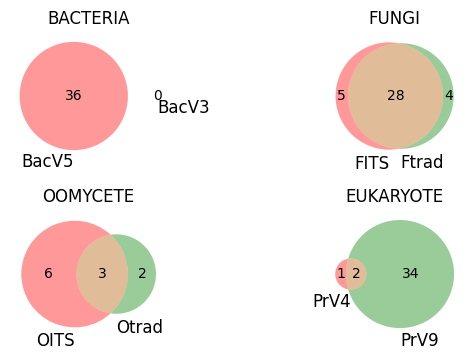

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(6.7, 3.7))

venn_bac_otu_wl = diagram_to_decide_loci_to_use(otu_wl_table, BACTERIA, axes[0, 0])
axes[0, 0].set_title("BACTERIA")

venn_fun_otu_wl = diagram_to_decide_loci_to_use(otu_wl_table, FUNGI, axes[0, 1])
axes[0, 1].set_title("FUNGI")

venn_oom_otu_wl = diagram_to_decide_loci_to_use(otu_wl_table, OOMYCETE, axes[1, 0])
axes[1, 0].set_title("OOMYCETE")

venn_euk_otu_wl = diagram_to_decide_loci_to_use(otu_wl_table, EUKARYOTE, axes[1, 1])
axes[1, 1].set_title("EUKARYOTE")

plt.tight_layout()
plt.show()

common shared classes: []
BacV5 hat this unique classes: {' TK10', ' Babeliae', ' Fimbriimonadia', ' Chloroflexia', ' Rubrobacteria', ' Kapabacteria', ' Abditibacteria', ' Deinococci', None, ' Oligoflexia', ' Bdellovibrionia', ' Acidobacteriae', ' Alphaproteobacteria', ' Ktedonobacteria', ' Myxococcia', ' Clostridia', ' Cyanobacteriia', ' Bacteroidia', ' Thermoleophilia', ' Bacilli', ' MB-A2-108', ' Actinobacteria', ' Blastocatellia', ' Gammaproteobacteria', ' Polyangia', ' Gemmatimonadetes', ' Armatimonadia', ' Acidimicrobiia'}
BacV3 hat this unique classes: {' Eutardigrada'}
common shared classes: ['Pezizomycetes', 'Pezizomycotina_cls_Incertae_sedis', 'Agaricostilbomycetes', 'Orbiliomycetes', 'Tremellomycetes', 'Mortierellomycetes', 'Ascomycota_cls_Incertae_sedis', 'Eukaryota_cls_Incertae_sedis', 'Cystobasidiomycetes', 'Arthoniomycetes', 'Monoblepharomycota_cls_Incertae_sedis', 'Rhizophlyctidomycetes', 'Spizellomycetes', 'Eurotiomycetes', 'Chytridiomycota_cls_Incertae_sedis', 'Taphri

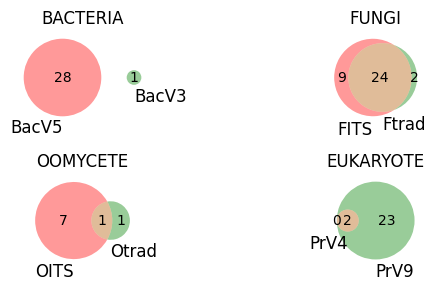

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(6.7, 3))

venn_bac_otu_endo = diagram_to_decide_loci_to_use(otu_endo_table, BACTERIA, axes[0, 0])
axes[0, 0].set_title("BACTERIA")

venn_fun_otu_endo = diagram_to_decide_loci_to_use(otu_endo_table, FUNGI, axes[0, 1])
axes[0, 1].set_title("FUNGI")

venn_oom_otu_endo = diagram_to_decide_loci_to_use(otu_endo_table, OOMYCETE, axes[1, 0])
axes[1, 0].set_title("OOMYCETE")

venn_euk_otu_endo = diagram_to_decide_loci_to_use(otu_endo_table, EUKARYOTE, axes[1, 1])
axes[1, 1].set_title("EUKARYOTE")

plt.tight_layout()
plt.show()

When inspecting the number of individual classes for each loci studied, the marker genes to study further are the following:
- BacV5
- FITS2
- Otrad
- PrV9

Otrad has less classes that OITS2, but it has the class Oomycetes as an individual class in the endophytes, and since Albugo is in this class, i will keep this marker gene for further analysis. FITS also has fever Classes than Ftrad but also got chosen because it holds more Dioszegia OTUs

In [24]:
def keep_columns_to_proceed(table):    
    table_columns = [col for col in table.columns if 'BacV5' in col or 'FITS' in col or 'Otrad' in col or 'PrV9' in col]    
    table = table[table_columns]
    row_has_zeros = table.eq(0).all(axis=1)
    table = table[~row_has_zeros]
    
    return table

In [25]:
otu_wl_table = keep_columns_to_proceed(otu_wl_table)
otu_endo_table = keep_columns_to_proceed(otu_endo_table)

In [46]:
otu_wl_table.to_csv('raw_otu_and_tax/Approach6/_all_otu_table_filtered_wl_ap6_no_merge.tsv', sep='\t')
otu_endo_table.to_csv('raw_otu_and_tax/Approach6/_all_otu_table_filtered_endo_ap6_no_merge.tsv', sep='\t')

## Normalization

The rarefaction will happen in R because there is no proper function for that in python. The rarefied tables get imported as the first step and then further processed.

In [26]:
def relative_abundance_by_sample(table):
    table_numeric = table.apply(pd.to_numeric, errors='coerce')
    numeric_columns = table_numeric.select_dtypes(include=[np.number]).columns
    relative_abundance_df = table_numeric[numeric_columns].div(table_numeric[numeric_columns].sum(axis=0), axis=1)    
    return relative_abundance_df

In [27]:
otu_wl_table = relative_abundance_by_sample(otu_wl_table)
otu_endo_table = relative_abundance_by_sample(otu_endo_table)

## Merge the samples by their ID

In [29]:
def merge_samples_by_their_id(table, metadata):

    column_mapping = dict(zip(metadata['#SampleID'], metadata['Identifier']))
    table.rename(columns=column_mapping, inplace=True)

    column_counts = Counter(table.columns.tolist())
    values_with_different_count = [value for value, count in column_counts.items() if count == 4]

    table = table[values_with_different_count]
    
    table = table.transpose()
    summed_table = table.groupby(level = 0).sum()
    summed_table = summed_table.transpose()
    summed_table = summed_table.loc[(summed_table != 0).any(axis=1)]
    
    return summed_table

In [30]:
otu_wl_table = merge_samples_by_their_id(otu_wl_table, mapfile)
otu_endo_table = merge_samples_by_their_id(otu_endo_table, mapfile)

In [55]:
otu_wl_table.to_csv('raw_otu_and_tax/Approach6/_all_otu_table_normalized_relAB_wl_ap6.tsv', sep='\t')
otu_endo_table.to_csv('raw_otu_and_tax/Approach6/_all_otu_table_normalized_relAB_endo_ap6.tsv', sep='\t')

## Create taxonomy table

In [169]:
# otu_taxonomy = otu_taxonomy.drop(['Confidence'], axis=1)
otu_taxonomy.to_csv('raw_otu_and_tax/Approach6/taxonomy.tsv', sep='\t', index=False)